# UTSA CS 3793/5233: Assignment-4

**Roberts - First Clay - (gbi069)**






## Learning Objectives

*   Deep Learning
*   Computer Vision - Convolutional Neural Network
*   Natural Language Processing - Recurrent Neural Network


## General Information

The base structure and comments are provided on what should be done. You are free to use any code from online sources, but please cite the source properly. Also, you are supposed to create/train the DL model and not use pre-trained models.

**TIPS** while working on this assignment:


*   You will have to keep on updating the model to improve accuracy. Hence, all except the first step (loading the data) would be repeated multiple times. i.e. repeat -- model creation, training & testing.
*   Training a Deep Learning model on real-world datasets and obtain decent accuracy is time consuming. For this assignment, it may take at least 40-60 min, if not more, to train the complete data and get around 35% testing accuracy. Hence, have enough time planned out for finishing the assignment.
*   Because of the large training time, it is impossisble to train each student's model. Hence, you will be required to **save the weights** in a file. These weights can then be loaded for testing purposes. More information is provided in a TensorFlow tutorial [here](https://www.tensorflow.org/tutorials/keras/save_and_load).
*   Please refer to the [TensorFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras) for selecting the *'activation function', 'loss', 'optimizer' & 'metrics'*. At least use 'accuracy' as one of the 'metrics'.




##Import Libraries

Write all the import statements here.

In [1]:
# import all required libraries

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from google.colab import drive
drive.mount('/content/drive')
import cv2
import random
import copy
from tensorflow.python.ops.gen_array_ops import Empty
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"
!ls "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"

cities.csv     gd-test.dat   id3-test.dat   texas-map.png
distances.csv  gd-train.dat  id3-train.dat


# Computer Vision - CNN

The goal of this task is to get hands-on experience in developing, training and testing **Convolutional Neural Network** for the Computer Vision task of Object/Image Classification.

## Load/Prepare Data

(20 points)

In this assignment, will work with the well-known **CIFAR-100 dataset**. The dataset consists of 60000 32x32 color images, which belong to 100 classes, with 600 images per class. There are 50000 training images (500 per class) and 10000 test images (100 per class). The 100 classes in the dataset are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html). Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

In this section, you will write code for the following:

*   Load the CIFAR-100 dataset
*   Prepare the data to be used for the DL model creation and training
*   Visualize the data by plotting 100 random images, one each for the 100 classes



In [3]:
# Load the data - training as well as testing
cifar100_data = tf.keras.datasets.cifar100
(train_data, train_data_y) , (test_data, y_test) = cifar100_data.load_data()

# Prepare the data that can be used by the next step - creating and training the DL model
train_data, test_data = train_data / 255.0, test_data / 255.0
x_train, x_val, y_train, y_val = train_test_split(train_data, train_data_y,test_size=0.2)

print(train_data.shape)
print(test_data.shape)
print(len(np.unique(y_train)))
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)
print(test_data.shape)


# The data from TensforFlow and Keras will only have integer class labels. Each of those 100 integer class labels correspond to the following names, in the correct order
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# These are the string labels for the 20 superclasses. You may not need to use this at all, just provided here for reference.
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']



(50000, 32, 32, 3)
(10000, 32, 32, 3)
100
(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 1)
(10000, 1)
(10000, 32, 32, 3)


In [4]:
print(y_train[0])
print(fine_labels[19])
print(fine_labels[y_train[0][0]])
print(train_data.shape)

[5]
cattle
bed
(50000, 32, 32, 3)


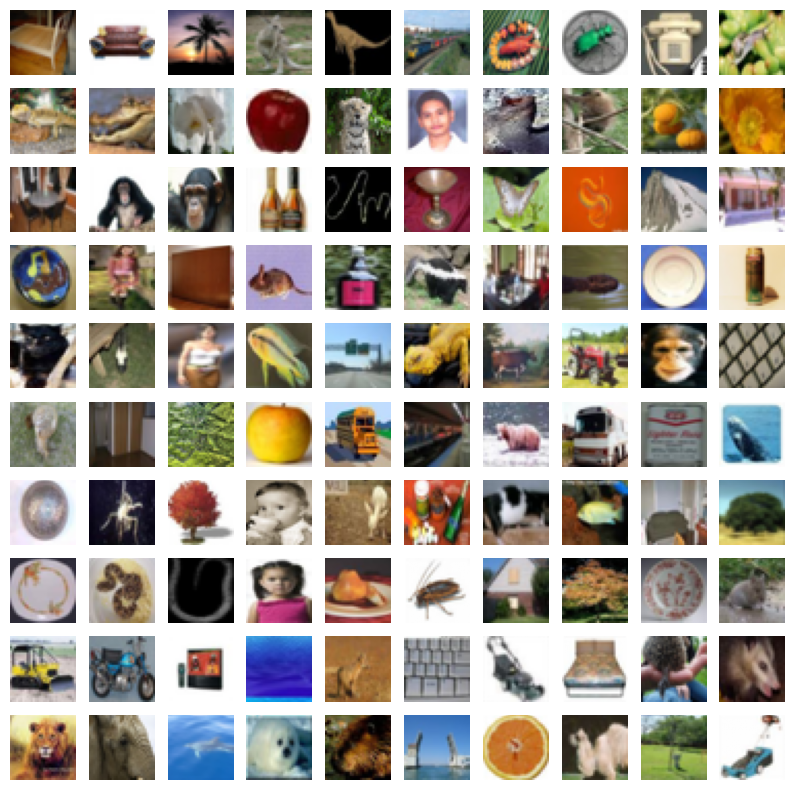

In [5]:
# Visualize the data by plotting 100 random images, one each for the 100 classes
# Draw 10 images in one row, 10 rows total
pic_list = []
show_list = []
for i in range(0,100):
  get_indexes = y_train[np.where(y_train == i)] # create a list of all instances of current random label to choose from
  choose = random.choice(get_indexes) # choose a random instance from previous list
  pic_list.append(choose) # save the index of the current selection in y_train data for the image
  show_list.append(x_train[choose]) # save the instances from the training data that correspond to the y_train labels that were chosen

plt.figure(figsize = (10,10))
for i in range(100):
  plt.subplot(10,10,1+i)
  plt.axis('off')
  plt.imshow(show_list[i], cmap = 'gray')


## CNN Model Creation

(15 points)

In this section, you will write code for the following:

*   Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
*   Print the DL model summary

In [6]:
# Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
def create_model_cv():
  model = keras.Sequential([
                            keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 3)),
                            keras.layers.MaxPooling2D(pool_size=(2,2)),
                            keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                            keras.layers.MaxPooling2D(pool_size=(2,2)),
                            keras.layers.Flatten(),
                            keras.layers.Dense(100, activation='relu'),
                            keras.layers.Dense(len(np.unique(y_train)), activation='softmax')
  ])
  model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model



In [7]:
# Print the DL model summary
model = create_model_cv()
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 100)               2

## Training

(15 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training CIFAR-100 data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/", to be used for the testing phase


In [8]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/"
cp = keras.callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/cifar/", save_weights_only=True, verbose=1)


In [9]:
# Train/fit the DL model using the training CIFAR-100 data
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=25, batch_size=50, callbacks=[cp])


Epoch 1/25
800/800 [==============================] - ETA: 0s - loss: 4.5930 - accuracy: 0.0133
Epoch 1: saving model to /content/drive/My Drive/Colab Notebooks/cifar/
800/800 [==============================] - 69s 85ms/step - loss: 4.5930 - accuracy: 0.0133 - val_loss: 4.5696 - val_accuracy: 0.0195
Epoch 2/25
800/800 [==============================] - ETA: 0s - loss: 4.4873 - accuracy: 0.0284
Epoch 2: saving model to /content/drive/My Drive/Colab Notebooks/cifar/
800/800 [==============================] - 69s 86ms/step - loss: 4.4873 - accuracy: 0.0284 - val_loss: 4.3421 - val_accuracy: 0.0399
Epoch 3/25
800/800 [==============================] - ETA: 0s - loss: 4.2168 - accuracy: 0.0569
Epoch 3: saving model to /content/drive/My Drive/Colab Notebooks/cifar/
800/800 [==============================] - 64s 79ms/step - loss: 4.2168 - accuracy: 0.0569 - val_loss: 4.1178 - val_accuracy: 0.0707
Epoch 4/25
800/800 [==============================] - ETA: 0s - loss: 4.0537 - accuracy: 0.0830
E

In [10]:
print(history.params)
print(history.history.keys())
print(history.history['loss'])
print(history.history['accuracy'])

{'verbose': 1, 'epochs': 25, 'steps': 800}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[4.593026161193848, 4.487253665924072, 4.216837406158447, 4.053731918334961, 3.9238555431365967, 3.8031320571899414, 3.7053730487823486, 3.613710641860962, 3.5179808139801025, 3.4194440841674805, 3.320176839828491, 3.229417324066162, 3.146387815475464, 3.0669429302215576, 2.9953532218933105, 2.9271700382232666, 2.8669161796569824, 2.804198980331421, 2.7496402263641357, 2.7024948596954346, 2.6521999835968018, 2.605681896209717, 2.5597684383392334, 2.517462730407715, 2.477856159210205]
[0.013325000181794167, 0.02837499976158142, 0.05692499876022339, 0.08297500014305115, 0.10692500323057175, 0.1271750032901764, 0.14470000565052032, 0.1616249978542328, 0.1774500012397766, 0.19382500648498535, 0.2133750021457672, 0.23052500188350677, 0.24684999883174896, 0.26022499799728394, 0.2739500105381012, 0.2842999994754791, 0.29919999837875366, 0.30869999527931213, 0.31802499294281006, 0.32977500557

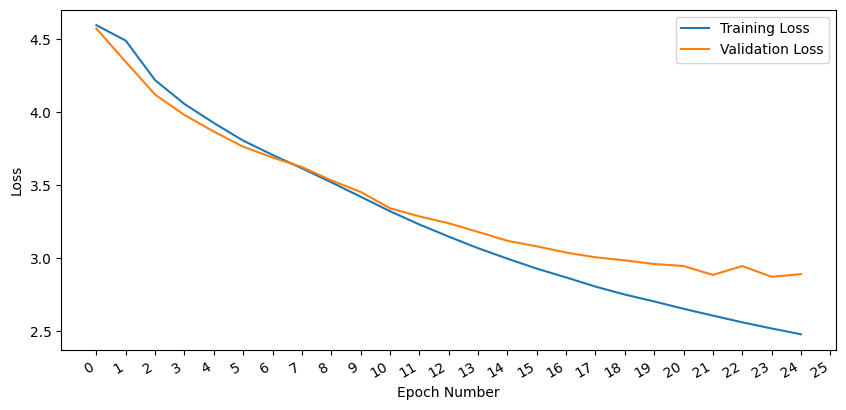

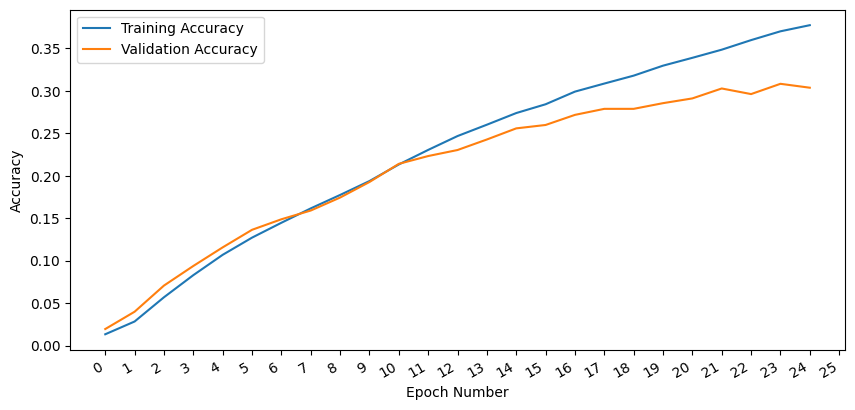

In [11]:
# Plot the training/validation accuracy and loss
plt.figure(figsize=(10,5))
epoch_loss_train = history.history['loss']
epoch_loss_val = history.history['val_loss']
epoch_num = range(0, 25, 1)
plt.plot(epoch_loss_train, label="Training Loss")
plt.plot(epoch_loss_val, label="Validation Loss")
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.xticks(range(0, 26, 1))
plt.gcf().autofmt_xdate()
plt.show()

plt.figure(figsize=(10,5))
epoch_acc_train = history.history['accuracy']
epoch_acc_val = history.history['val_accuracy']
epoch_num = range(0, 25, 1)
plt.plot(epoch_acc_train, label="Training Accuracy")
plt.plot(epoch_acc_val, label="Validation Accuracy")
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.xticks(range(0, 26, 1))
plt.gcf().autofmt_xdate()
plt.show()

## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/cifar/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the CIFAR-100 test dataset. Accuracy value should be printed. Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

This section of the code should be able to run independently from the **training** section, i.e. run this section directly after creating the model.

In [12]:
# Re-initialize the model
model = create_model_cv()


In [13]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/cifar/"
model.load_weights("/content/drive/My Drive/Colab Notebooks/cifar/")


In [14]:
# Evaluate the trained DL model on the CIFAR-100 test dataset
test_eval = model.evaluate(test_data, y_test)


313/313 [==============================] - 5s 14ms/step - loss: 2.8687 - accuracy: 0.3022


# Natural Language Processing - RNN

The goal of this task is to get hands-on experience in developing, training and testing **Recurrent Neural Network** for the Natural Language Processing task of Sentiment Analysis / Text Classification. In this part, you will work with the well-known **Reuters newswire classification dataset**. The dataset consists of newswires from Reuters, labeled over 46 topics. More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection) or [here](https://keras.io/api/datasets/reuters/). The Keras dataset is a cleaned and organized version of the original dataset and consists of 11,228 newswires (8982 training and 2246 testing). The goal is to classify a newswire into one of the 46 output catergories.


## Load/Prepare Data

(15 points)

In this section, you will write code for the following:

*   Load the Reuters dataset - use the Keras version
 *   Select the vocabulary size while loading the data
 *   The data will be loaded as integer representations for each word
*   Prepare the data to be used for the next steps
 *   Each data entry (newswire) can be of different lengths
 *   Make each newswire consistent - same number of words
 *   'Pad' words (say 0) to get to the standard length or remove words

In [15]:
# Load the Reuters dataset - use the Keras version
#   Select the vocabulary size while loading the data
#   The data will be loaded as integer representations for each word
reuters_data = tf.keras.datasets.reuters
(train_data, train_data_y) , (test_data, y_test) = reuters_data.load_data(num_words=10000)
words = keras.datasets.reuters.get_word_index()


In [16]:
words = {k:(v+3) for k,v in words.items()}
words["<PAD>"] = 0
words["<START>"] = 1
words["<UNK>"] = 2
words["<UNUSED>"] = 3

In [17]:
inverted_word_index = dict((i, word) for (word, i) in words.items())

In [18]:
# Prepare the data to be used for the next steps
#   Each data entry (newswire) can be of different lengths
#   Make each newswire consistent - same number of words
#   'Pad' words (say 0) to get to the standard length or remove words
x_train, x_val, y_train, y_val = train_test_split(train_data, train_data_y, test_size=0.2)

x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=128, padding='post', truncating='post', value=0)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=128, padding='post', truncating='post', value=0)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, maxlen=128, padding='post', truncating='post', value=0)


In [19]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)
print(test_data.shape)
print(len(np.unique(y_train)))

(7185, 128)
(1797, 128)
(7185,)
(1797,)
(2246, 128)
46


In [20]:
print(len(x_train[0]), len(x_train[1]))

128 128


In [21]:
print(x_train[1])

[   1 4561   71   56    2   10    4  342 3620  907   23 2919   10  376
   11  150 1051  733  208   91  187 4560 3050   42 1413 2403    5   44
   12   47    6  155   20    8 1411 1339  244  236   43  616  937    4
  394   33   30 1473    6   57   10 2630 1802    5  272    6  147   20
   31  584  316    6   30  306   21  918   93   59    4  326   80   54
 1204   21    4 2459   80  108   28  258   12   63    4  221   33   30
 2408    7 2477    9   55  554    7 5732    5   19   18    9   83   18
   15 2782  439   10   68   20 1178  362    9 3022    9   10   68   20
  661 3989   17   12    0    0    0    0    0    0    0    0    0    0
    0    0]


In [22]:
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])
print(decoded_sequence)

<START> the u s mint said it awarded contracts to <UNK> brothers n y and <UNK> <UNK> a new york metals merchant to <UNK> 3 701 000 lbs of electrolytic copper and 629 000 lbs electrolytic cut nickel cathodes or <UNK> the mint said <UNK> brothers will supply the entire 3 701 000 lbs of copper at a cost of 0 <UNK> dlrs per lb <UNK> <UNK> will <UNK> 338 000 lbs of the nickel at 1 <UNK> dlrs per lb while <UNK> will provide 291 000 lbs at 1 <UNK> dlrs per lb the mint said reuter 3 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


## RNN Model Creation

(15 points)

In this section, you will write code for the following:

*   Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
*   Print the DL model summary

In [23]:
# Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
def create_model_nlp():
  model = keras.Sequential([
                    keras.layers.Embedding(input_dim=10000, output_dim=64),
                    keras.layers.LSTM(128),
                    keras.layers.Dense(16, activation='relu'),
                    keras.layers.Dense(len(np.unique(y_train)), activation='softmax')
  ])

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model


In [24]:
# Print the DL model summary
model = create_model_nlp()
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640000    
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense_4 (Dense)             (None, 16)                2064      
                                                                 
 dense_5 (Dense)             (None, 46)                782       
                                                                 
Total params: 741,662
Trainable params: 741,662
Non-trainable params: 0
_________________________________________________________________
None


## Training

(15 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training Reuters data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load)), to be used for the testing phase


In [25]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/"
cp_nlp = keras.callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/reuters/", save_weights_only=True)


In [26]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(7185, 128) (7185,) (1797, 128) (1797,)


In [27]:
# Train/fit the DL model using the training Reuters data
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=25, batch_size=64, callbacks=[cp_nlp])

Epoch 1/25
113/113 [==============================] - 45s 370ms/step - loss: 2.7616 - accuracy: 0.2605 - val_loss: 2.4238 - val_accuracy: 0.3734
Epoch 2/25
113/113 [==============================] - 42s 373ms/step - loss: 2.2163 - accuracy: 0.3769 - val_loss: 2.1214 - val_accuracy: 0.4051
Epoch 3/25
113/113 [==============================] - 42s 369ms/step - loss: 2.1133 - accuracy: 0.3967 - val_loss: 2.1841 - val_accuracy: 0.3895
Epoch 4/25
113/113 [==============================] - 39s 345ms/step - loss: 2.1333 - accuracy: 0.3946 - val_loss: 2.1323 - val_accuracy: 0.3996
Epoch 5/25
113/113 [==============================] - 43s 385ms/step - loss: 2.1774 - accuracy: 0.3801 - val_loss: 2.1347 - val_accuracy: 0.3901
Epoch 6/25
113/113 [==============================] - 41s 364ms/step - loss: 2.0400 - accuracy: 0.4296 - val_loss: 2.0799 - val_accuracy: 0.4329
Epoch 7/25
113/113 [==============================] - 40s 351ms/step - loss: 2.0024 - accuracy: 0.4753 - val_loss: 2.0054 - val_ac

In [28]:
print(history.params)
print(history.history.keys())
print(history.history['loss'])
print(history.history['accuracy'])

{'verbose': 1, 'epochs': 25, 'steps': 113}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[2.761603832244873, 2.2162585258483887, 2.1132652759552, 2.1332621574401855, 2.177363395690918, 2.039968729019165, 2.0024194717407227, 1.9876618385314941, 1.8759841918945312, 1.7520513534545898, 1.6760042905807495, 1.799931526184082, 1.759567141532898, 1.6264034509658813, 1.5528939962387085, 1.4875131845474243, 1.426780104637146, 1.3889111280441284, 1.3951704502105713, 1.3270909786224365, 1.4534660577774048, 1.3705835342407227, 1.3050121068954468, 1.2719120979309082, 1.2296175956726074]
[0.2605428099632263, 0.37689632177352905, 0.3966597020626068, 0.39457201957702637, 0.3800974190235138, 0.4296450912952423, 0.475295752286911, 0.46471816301345825, 0.4526095986366272, 0.4993737041950226, 0.5389004945755005, 0.4335421025753021, 0.48239389061927795, 0.5496172308921814, 0.5742518901824951, 0.6018093228340149, 0.6176757216453552, 0.63075852394104, 0.6308977007865906, 0.6416144967079163, 0.6

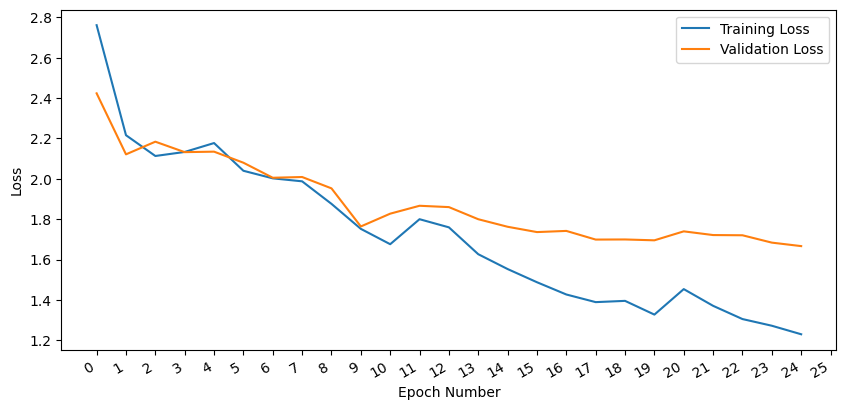

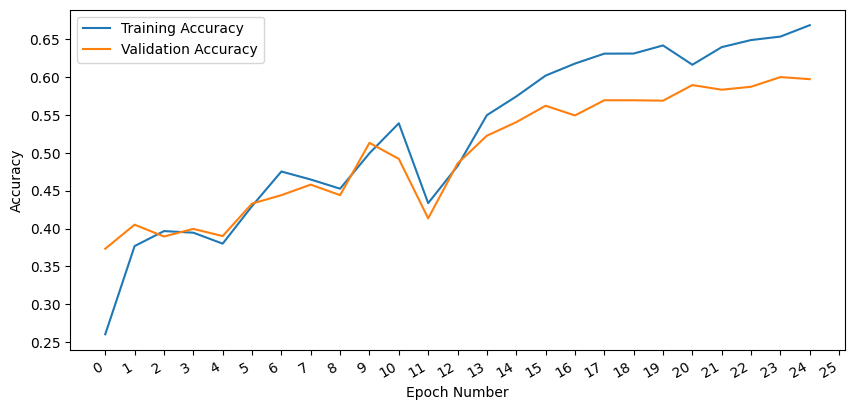

In [29]:
# Plot the training/validation accuracy and loss
plt.figure(figsize=(10,5))
epoch_loss_train = history.history['loss']
epoch_loss_val = history.history['val_loss']
epoch_num = range(0, 25, 1)
plt.plot(epoch_loss_train, label="Training Loss")
plt.plot(epoch_loss_val, label="Validation Loss")
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.xticks(range(0, 26, 1))
plt.gcf().autofmt_xdate()
plt.show()

plt.figure(figsize=(10,5))
epoch_acc_train = history.history['accuracy']
epoch_acc_val = history.history['val_accuracy']
epoch_num = range(0, 25, 1)
plt.plot(epoch_acc_train, label="Training Accuracy")
plt.plot(epoch_acc_val, label="Validation Accuracy")
plt.legend()
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.xticks(range(0, 26, 1))
plt.gcf().autofmt_xdate()
plt.show()


## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the Reuters test dataset. Accuracy value should be printed.

This section of the code should be able to run independently from the **training** section, i.e., run this section directly after creating the model.

In [30]:
# Re-initialize the model
model = create_model_nlp()


In [31]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/reuters/"
model.load_weights("/content/drive/My Drive/Colab Notebooks/reuters/")


In [32]:
# Evaluate the trained DL model on the Reuters test dataset
model.evaluate(test_data, y_test)


71/71 [==============================] - 8s 90ms/step - loss: 1.6752 - accuracy: 0.5935


[1.6752376556396484, 0.5934995412826538]

# Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Download and zip the folders "/content/drive/My Drive/Colab Notebooks/cifar/" (abc123_cifar_model.zip) and "/content/drive/My Drive/Colab Notebooks/reuters/" (abc123_reuters_model.zip)
4.   Upload the .ipynb file and .zip on Blackboard



## Rubric

*   Computer Vision - CNN
    *   (20 points) Load/Prepare Data
    *   (15 points) CNN Model Creation
    *   (15 points) Training
    *   (15 points) Testing/Evaluation
*   Natural Language Processing - RNN
    *   (15 points) Load/Prepare Data
    *   (15 points) RNN Model Creation
    *   (15 points) Training
    *   (15 points) Testing/Evaluation

